In [4]:
# Setup environment
import os
import glob
import subprocess
import sys
import time
from scipy.io import netcdf as nc

import matplotlib.pyplot as plt
from os.path import expanduser

# Define output path
home = expanduser("~")
output_dir = os.path.join(home,'scratch/elm_testruns')  # main host machine output directory
os.makedirs(os.path.dirname(output_dir), exist_ok=True)
print(output_dir)

/Users/sserbin/scratch/elm_testruns


In [7]:
# Grab latest ELM docker container from Docker hub
container_source = "fasstsimulation/elm-builds"
docker_container_tag = "elm_v2-for-ngee"
container_name = ''.join([container_source,":",docker_container_tag])
print(container_name)
docker_pull_command = ''.join(["docker pull ",container_source,":",docker_container_tag])
os.system(docker_pull_command)

fasstsimulation/elm-builds:elm_v2-for-ngee
elm_v2-for-ngee: Pulling from fasstsimulation/elm-builds
Digest: sha256:053d765889c59a9d0c3937e36e50f125ad3be83916b6651e450867e845dc341d
Status: Image is up to date for fasstsimulation/elm-builds:elm_v2-for-ngee
docker.io/fasstsimulation/elm-builds:elm_v2-for-ngee


0

In [7]:
# Create docker volumes for output
elmdata_name = "elmdata"
elmoutput_name = "elmoutput"
run_command1 = ''.join(['docker volume create ', elmdata_name])
run_command2 = ''.join(['docker volume create ', elmoutput_name])
#print(run_command)
os.system(run_command1)
os.system(run_command2)

elmdata
elmoutput


0

In [8]:
# Define run options for OLMT
#docker run -t -i --hostname=docker --user modeluser -v elmdata:/inputdata -v elmoutput:/output fasstsimulation/elm-builds:elm_v2-for-ngee /scripts/OLMT_docker_example.sh
hostname="docker"
user="modeluser"
elmdata="elmdata"      # where are the input driver datasets need for ELM?
elmoutput="elmoutput"  # where do you want to put the model output?
#script_to_run="OLMT_docker_example.sh"
script_to_run="OLMT_docker_example_short.sh"

# example input/output locations other than docker volumes
elmoutput="~/scratch/elm_testruns/olmt_test"

elm_run_command = ''.join(['docker run --hostname=', hostname,' --user ', \
                           user, ' -v ', elmdata,':/inputdata -v ', elmoutput, ':/output', \
                           ' ', container_source,':',docker_container_tag, ' /scripts/', \
                          script_to_run])
print(elm_run_command)

docker run --hostname=docker --user modeluser -v elmdata:/inputdata -v ~/scratch/elm_testruns/olmt_test:/output fasstsimulation/elm-builds:elm_v2-for-ngee /scripts/OLMT_docker_example_short.sh


In [50]:
# Run the model simulation
# Create new case
start = time.time()
print("Start date/time: "+time.asctime())
# run the docker container
os.system(elm_run_command)
# get runtime
end = time.time()
print("End date/time: "+time.asctime())
#Print runtime
runtime = (end - start)
print("Total ellapsed time: "+str(runtime)+" seconds")

Start date/time: Tue Aug  9 17:25:04 2022


Variable MAX_GPUS_PER_NODE not defined for machine docker


('land model name: ', 'ELM')
Machine is: docker
--rmold specified.  Removing old case 
CASE directory is: /output/cime_case_dirs/OLMT_AK-K64G_ICB1850CNRDCTCBC_ad_spinup
CASE exeroot is: /output/cime_run_dirs/OLMT_AK-K64G_ICB1850CNRDCTCBC_ad_spinup/bld
CASE rundir is: /output/cime_run_dirs/OLMT_AK-K64G_ICB1850CNRDCTCBC_ad_spinup/run
Removing build directory: /output/cime_run_dirs/OLMT_AK-K64G_ICB1850CNRDCTCBC_ad_spinup/bld
Removing run directory: /output/cime_run_dirs/OLMT_AK-K64G_ICB1850CNRDCTCBC_ad_spinup/run

 -----INFO: using user-provided DOMAIN
domain file: /inputdata/share/domains/domain.clm/domain.lnd.1x1pt_kougarok-GRID_navy.nc

 -----INFO: using user-provided SURFDATA
surface data file: /inputdata/lnd/clm2/surfdata_map/surfdata_1x1pt_kougarok-GRID_simyr1850_c360x720_171002.nc

 -----INFO: using user-provided 20th landuse data file
20th landuse data file: /inputdata/lnd/clm2/surfdata_map/landuse.timeseries_1x1pt_kougarok-GRID_simyr1850-2015_c180423.nc'


 -----INFO: using user-

Variable MAX_GPUS_PER_NODE not defined for machine docker


For your changes to take effect, run:
./case.build --clean-all
./case.build
('land model name: ', 'ELM')
Machine is: docker
CASE directory is: /output/cime_case_dirs/OLMT_AK-K64G_ICB1850CNPRDCTCBC
CASE exeroot is: /output/cime_run_dirs/OLMT_AK-K64G_ICB1850CNRDCTCBC_ad_spinup/bld
CASE rundir is: /output/cime_run_dirs/OLMT_AK-K64G_ICB1850CNPRDCTCBC/run
Removing run directory: /output/cime_run_dirs/OLMT_AK-K64G_ICB1850CNPRDCTCBC/run

 -----INFO: using user-provided DOMAIN
domain file: /inputdata/share/domains/domain.clm/domain.lnd.1x1pt_kougarok-GRID_navy.nc

 -----INFO: using user-provided SURFDATA
surface data file: /inputdata/lnd/clm2/surfdata_map/surfdata_1x1pt_kougarok-GRID_simyr1850_c360x720_171002.nc

 -----INFO: using user-provided 20th landuse data file
20th landuse data file: /inputdata/lnd/clm2/surfdata_map/landuse.timeseries_1x1pt_kougarok-GRID_simyr1850-2015_c180423.nc'


 -----INFO: using user-provided forcing data
Under directory: /inputdata/atm/datm7/atm_forcing.datm7.GSWP

Variable MAX_GPUS_PER_NODE not defined for machine docker


For your changes to take effect, run:
./case.build --clean-all
./case.build
('land model name: ', 'ELM')
Machine is: docker
CASE directory is: /output/cime_case_dirs/OLMT_AK-K64G_ICB20TRCNPRDCTCBC
CASE exeroot is: /output/cime_run_dirs/OLMT_AK-K64G_ICB1850CNRDCTCBC_ad_spinup/bld
CASE rundir is: /output/cime_run_dirs/OLMT_AK-K64G_ICB20TRCNPRDCTCBC/run
Removing run directory: /output/cime_run_dirs/OLMT_AK-K64G_ICB20TRCNPRDCTCBC/run

 -----INFO: using user-provided DOMAIN
domain file: /inputdata/share/domains/domain.clm/domain.lnd.1x1pt_kougarok-GRID_navy.nc

 -----INFO: using user-provided SURFDATA
surface data file: /inputdata/lnd/clm2/surfdata_map/surfdata_1x1pt_kougarok-GRID_simyr1850_c360x720_171002.nc

 -----INFO: using user-provided 20th landuse data file
20th landuse data file: /inputdata/lnd/clm2/surfdata_map/landuse.timeseries_1x1pt_kougarok-GRID_simyr1850-2015_c180423.nc'


 -----INFO: using user-provided forcing data
Under directory: /inputdata/atm/datm7/atm_forcing.datm7.GSWP

Model elm no file specified for finidat
submit_jobs case.run
Submit job case.run


2022-08-09 21:45:48 NAMELIST CREATION BEGINS HERE
Generating namelists for /output/cime_case_dirs/OLMT_AK-K64G_ICB1850CNRDCTCBC_ad_spinup
  2022-08-09 21:45:48 atm 
Create namelist for component satm
   Calling /E3SM/components/stub_comps/satm/cime_config/buildnml
  2022-08-09 21:45:48 lnd 
Create namelist for component elm
   Calling /E3SM/components/elm//cime_config/buildnml
  2022-08-09 21:45:48 ice 
Create namelist for component sice
   Calling /E3SM/components/stub_comps/sice/cime_config/buildnml
  2022-08-09 21:45:48 ocn 
Create namelist for component socn
   Calling /E3SM/components/stub_comps/socn/cime_config/buildnml
  2022-08-09 21:45:48 rof 
Create namelist for component mosart
   Calling /E3SM/components/mosart//cime_config/buildnml
  2022-08-09 21:45:49 glc 
Create namelist for component sglc
   Calling /E3SM/components/stub_comps/sglc/cime_config/buildnml
  2022-08-09 21:45:49 wav 
Create namelist for component swav
   Calling /E3SM/components/stub_comps/swav/cime_config/

check for resubmit
dout_s False 
mach docker 
resubmit_num 0
adjust_restart.py:96: UserWarning: Warning: converting a masked element to nan.
  if (float(rest_vals[i]) > 0.0 and float(hist_vals[0][i]) < 1.0e10 and float(hist_vals[0][i]) > 0.001):


  2022-08-09 22:18:02 atm 
Create namelist for component satm
   Calling /E3SM/components/stub_comps/satm/cime_config/buildnml
  2022-08-09 22:18:02 lnd 
Create namelist for component elm
   Calling /E3SM/components/elm//cime_config/buildnml
  2022-08-09 22:18:02 ice 
Create namelist for component sice
   Calling /E3SM/components/stub_comps/sice/cime_config/buildnml
  2022-08-09 22:18:02 ocn 
Create namelist for component socn
   Calling /E3SM/components/stub_comps/socn/cime_config/buildnml
  2022-08-09 22:18:02 rof 
Create namelist for component mosart
   Calling /E3SM/components/mosart//cime_config/buildnml
  2022-08-09 22:18:03 glc 
Create namelist for component sglc
   Calling /E3SM/components/stub_comps/sglc/cime_config/buildnml
  2022-08-09 22:18:03 wav 
Create namelist for component swav
   Calling /E3SM/components/stub_comps/swav/cime_config/buildnml
  2022-08-09 22:18:03 iac 
Create namelist for component siac
   Calling /E3SM/components/stub_comps/siac/cime_config/buildnml
  

submit_jobs case.run
Submit job case.run


  2022-08-09 22:18:05 atm 
Create namelist for component satm
   Calling /E3SM/components/stub_comps/satm/cime_config/buildnml
  2022-08-09 22:18:05 lnd 
Create namelist for component elm
   Calling /E3SM/components/elm//cime_config/buildnml
  2022-08-09 22:18:06 ice 
Create namelist for component sice
   Calling /E3SM/components/stub_comps/sice/cime_config/buildnml
  2022-08-09 22:18:06 ocn 
Create namelist for component socn
   Calling /E3SM/components/stub_comps/socn/cime_config/buildnml
  2022-08-09 22:18:06 rof 
Create namelist for component mosart
   Calling /E3SM/components/mosart//cime_config/buildnml
  2022-08-09 22:18:06 glc 
Create namelist for component sglc
   Calling /E3SM/components/stub_comps/sglc/cime_config/buildnml
  2022-08-09 22:18:06 wav 
Create namelist for component swav
   Calling /E3SM/components/stub_comps/swav/cime_config/buildnml
  2022-08-09 22:18:06 iac 
Create namelist for component siac
   Calling /E3SM/components/stub_comps/siac/cime_config/buildnml
  

check for resubmit
dout_s False 
mach docker 
resubmit_num 0


  2022-08-10 00:06:44 atm 
Create namelist for component satm
   Calling /E3SM/components/stub_comps/satm/cime_config/buildnml
  2022-08-10 00:06:44 lnd 
Create namelist for component elm
   Calling /E3SM/components/elm//cime_config/buildnml
  2022-08-10 00:06:45 ice 
Create namelist for component sice
   Calling /E3SM/components/stub_comps/sice/cime_config/buildnml
  2022-08-10 00:06:45 ocn 
Create namelist for component socn
   Calling /E3SM/components/stub_comps/socn/cime_config/buildnml
  2022-08-10 00:06:45 rof 
Create namelist for component mosart
   Calling /E3SM/components/mosart//cime_config/buildnml
  2022-08-10 00:06:46 glc 
Create namelist for component sglc
   Calling /E3SM/components/stub_comps/sglc/cime_config/buildnml
  2022-08-10 00:06:46 wav 
Create namelist for component swav
   Calling /E3SM/components/stub_comps/swav/cime_config/buildnml
  2022-08-10 00:06:46 iac 
Create namelist for component siac
   Calling /E3SM/components/stub_comps/siac/cime_config/buildnml
  

submit_jobs case.run
Submit job case.run


  2022-08-10 00:06:48 atm 
Create namelist for component satm
   Calling /E3SM/components/stub_comps/satm/cime_config/buildnml
  2022-08-10 00:06:48 lnd 
Create namelist for component elm
   Calling /E3SM/components/elm//cime_config/buildnml
  2022-08-10 00:06:48 ice 
Create namelist for component sice
   Calling /E3SM/components/stub_comps/sice/cime_config/buildnml
  2022-08-10 00:06:48 ocn 
Create namelist for component socn
   Calling /E3SM/components/stub_comps/socn/cime_config/buildnml
  2022-08-10 00:06:48 rof 
Create namelist for component mosart
   Calling /E3SM/components/mosart//cime_config/buildnml
  2022-08-10 00:06:49 glc 
Create namelist for component sglc
   Calling /E3SM/components/stub_comps/sglc/cime_config/buildnml
  2022-08-10 00:06:49 wav 
Create namelist for component swav
   Calling /E3SM/components/stub_comps/swav/cime_config/buildnml
  2022-08-10 00:06:49 iac 
Create namelist for component siac
   Calling /E3SM/components/stub_comps/siac/cime_config/buildnml
  

check for resubmit
dout_s False 
mach docker 
resubmit_num 0


 
 
 
**** Concatenating netCDF output - Hang tight this can take awhile ****
**** Concatenating netCDF output: DONE ****
End date/time: Tue Aug  9 22:20:56 2022
Total ellapsed time: 17751.67603778839 seconds


In [1]:
### Explore output
import xarray

In [7]:
output_file=''.join([elmoutput,'/cime_run_dirs/OLMT_AK-K64G_ICB20TRCNPRDCTCBC/run/ELM_output.nc'])
print(output_file)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sserbin/output/cime_run_dirs/OLMT_AK-K64G_ICB20TRCNPRDCTCBC/run/ELM_output.nc'

In [9]:
output=xarray.open_dataset(output_file).squeeze()
print(output)

<xarray.Dataset>
Dimensions:                   (levgrnd: 15, levlak: 10, levdcmp: 15,
                               time: 60226, hist_interval: 2, ltype: 9,
                               natpft: 17)
Coordinates:
  * levgrnd                   (levgrnd) float32 0.007101 0.02792 ... 21.33 35.18
  * levlak                    (levlak) float32 0.05 0.6 2.1 ... 25.6 34.33 44.78
  * levdcmp                   (levdcmp) float32 0.007101 0.02792 ... 21.33 35.18
  * time                      (time) object 1850-01-01 00:00:00 ... 2015-01-0...
Dimensions without coordinates: hist_interval, ltype, natpft
Data variables: (12/562)
    mcdate                    (time) int32 ...
    mcsec                     (time) int32 ...
    mdcur                     (time) int32 ...
    mscur                     (time) int32 ...
    nstep                     (time) int32 ...
    time_bounds               (time, hist_interval) object ...
    ...                        ...
    leaf_npimbalance          (time) float3

In [10]:
time = output['time']  ### time dimension, put in unit of years
print(time)

GPP = output['GPP']
print(GPP)
gpp2 = GPP*3600
print(gpp2)

TLAI = output['TLAI']
print(TLAI)

TOTVEGC = output['TOTVEGC']

<xarray.DataArray 'time' (time: 60226)>
array([cftime.DatetimeNoLeap(1850, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 1, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 1, 3, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2014, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 31, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-01 00:00:00 ... 2015-01-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bounds
<xarray.DataArray 'GPP' (time: 60226)>
array([0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 4.223107e-12,
       2.295196e-11, 3.418932e-11], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-01 00:00:00 ... 2015-01-01 00:00:00
Attributes:
    long_name:     gross primary production
    units:         gC/m^2/s
    cell_method

Text(0, 0.5, 'LAI (m2/m2)')

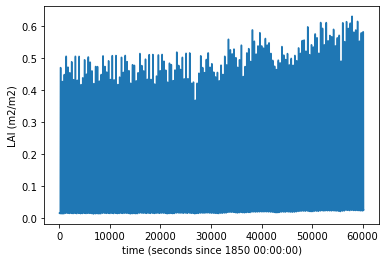

In [15]:
plt.plot(TLAI, label='TLAI')
plt.xlabel(''.join(['time (seconds since 1850 00:00:00)']))
plt.ylabel('LAI (m2/m2)')

Text(0, 0.5, 'GPP (gC/m2/hr)')

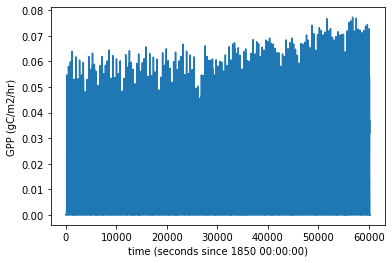

In [17]:
plt.plot(gpp2, label='GPP')
plt.xlabel(''.join(['time (seconds since 1850 00:00:00)']))
plt.ylabel('GPP (gC/m2/hr)')

Text(0.5, 0, 'time (seconds since 1850 00:00:00)')

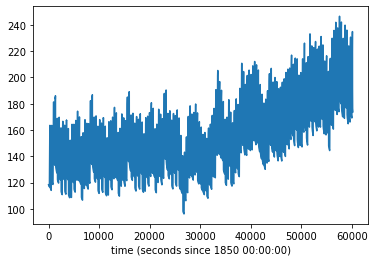

In [18]:
plt.plot(TOTVEGC, label='TOTVEGC')
plt.xlabel(''.join(['time (seconds since 1850 00:00:00)']))